In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/home/salini/Downloads/CHRISTY/TelecomCustomerChurn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
X=data.drop(['customerID','Churn'],axis=1)

In [9]:
y=data['Churn']

In [10]:
numcols=data.dtypes[(data.dtypes=='int64')|(data.dtypes=='float64')].index
numcols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

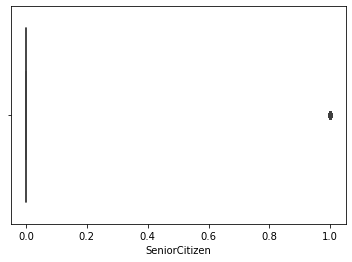

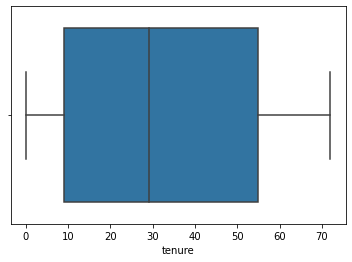

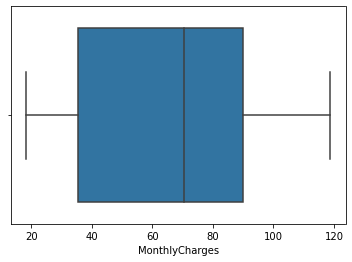

In [11]:
for x in numcols:
    sns.boxplot(data[x])
    plt.show()

In [12]:
for x in numcols:
    descr=data[x].describe()
    IQR=descr['75%']-descr['25%']
    upper_limit=descr['75%']+1.5*IQR
    lower_limit=descr['25%']-1.5*IQR
    data[x][data[x]>upper_limit]=upper_limit
    data[x][data[x]<lower_limit]=lower_limit

<ipython-input-12-9ab08303e841>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit]=upper_limit
<ipython-input-12-9ab08303e841>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit]=upper_limit
<ipython-input-12-9ab08303e841>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]<lower_limit]=lower_limit


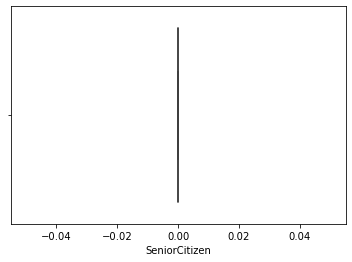

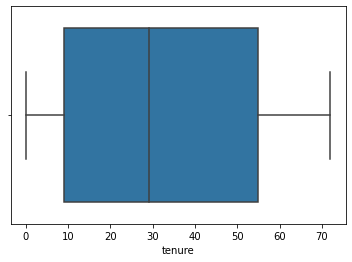

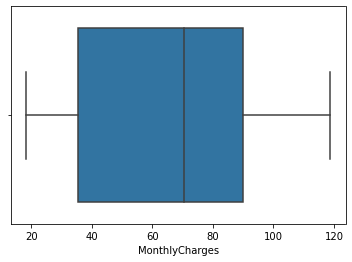

In [13]:
for x in numcols:
    sns.boxplot(data[x])
    plt.show()

In [14]:
objnumcols=X.dtypes[X.dtypes==object].index
objnumcols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [15]:
X=pd.get_dummies(X)

In [16]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,random_state=50) 

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()

In [20]:
n_estimator=[25,50,75,100]#no: of trees in the forest,default=100
criterion=['entropy']#criteria for chosing nodes default='gini'
max_depth=[3,5,10]#max number of nodes in a tree default=None(it will go till all possible nodes)
parameter={'n_estimators':n_estimator,'criterion':criterion,'max_depth':max_depth}#this will undergo 4*1*3=12 iterations
RFC_cls=GridSearchCV(cls,parameter)
RFC_cls.fit(X_train,y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100]})

In [21]:
RFC_cls.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}

In [22]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10)

In [23]:
cls.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [24]:
y_pred=cls.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1709,    0],
       [ 616,    0]])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7350537634408603

In [27]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [28]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X_train,y_train)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()
n_estimators=[25,50,75,100,125,150,175,200]
criterion=['gini','entropy']
max_depth=[3,5,10]
parameters={'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth}
RFC_cls=GridSearchCV(cls,parameter)
RFC_cls.fit(X_res,y_res)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100]})

In [30]:
RFC_cls.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [31]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10)

In [32]:
cls.fit(X_res,y_res)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [33]:
y_pred=cls.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [34]:
accuracy_score(y_test,y_pred)*100


73.50537634408603

In [35]:
confusion_matrix(y_test,y_pred)

array([[1198,  511],
       [ 105,  511]])

In [36]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

(array([0.91941673, 0.5       ]),
 array([0.70099473, 0.82954545]),
 array([0.79548473, 0.62393162]),
 array([1709,  616]))

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.92      0.70      0.80      1709
         Yes       0.50      0.83      0.62       616

    accuracy                           0.74      2325
   macro avg       0.71      0.77      0.71      2325
weighted avg       0.81      0.74      0.75      2325



In [40]:
from sklearn.metrics import roc_auc_score
rfc_probs=cls.predict_proba(X_test)
rfc_probs

array([[0.64184389, 0.35815611],
       [0.65198504, 0.34801496],
       [0.79922496, 0.20077504],
       ...,
       [0.36686481, 0.63313519],
       [0.43856362, 0.56143638],
       [0.66678587, 0.33321413]])